# Dynamic EarthNet Dataset

## Intro

Dynamic EarthNet [(Toker et al. 2022)](https://arxiv.org/abs/2203.12560) is a large-scale dataset for spatio-temporal Earth surface predictions using multi-modal satellite data. The combination of daily Planet Labs high-resolution imagery and Sentinel-2 multispectral imagery, paired with pixel-wise semantic segmentation labels of 7 land use and land cover (LULC) classes aim to advance efforts of land use evolution monitoring.

## Dataset Characteristics

- **Modalities**: 
  - Sentinel-2 optical imagery (10 spectral bands)
  - Planet high-resolution imagery (4 bands)
- **Spatial Resolution**: 
  - S2: 10m ground sample distance
  - Planet: ~3m ground sample distance
- **Temporal Resolution**: Daily observations of planet data
- **Spectral Bands**: 
  - S2: 10 bands (B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12)
  - Planet: RGB + NIR (4 bands)
- **Image Dimensions**: 512x512 pixels per patch (5.12km x 5.12km)
- **Labels**: 7-class land cover segmentation masks for spatio-temporal predictions
  - Class 0: Impervious surfaces
  - Class 1: Agriculture  
  - Class 2: Forest & other vegetation
  - Class 3: Wetlands
  - Class 4: Soil
  - Class 5: Water
  - Class 6: Snow & ice
- **Temporal Coverage**: Multi-year sequences (2016-2019) with monthly time series
- **Task**: Spatio-temporal prediction of land surface states

## Dataset Setup and Initialization

In [3]:
from pathlib import Path

from geobench_v2.datamodules import GeoBenchDynamicEarthNetDataModule

# Setup paths
PROJECT_ROOT = Path("../../")

# Initialize datamodule
datamodule = GeoBenchDynamicEarthNetDataModule(
    img_size=256,
    batch_size=4,
    num_workers=4,
    temporal_setting="weekly",
    root=PROJECT_ROOT / "data" / "dynamic_earthnet",
    download=True,
)
datamodule.setup("fit")
datamodule.setup("test")

print("Dynamic EarthNet datamodule initialized successfully!")
print(f"Training samples: {len(datamodule.train_dataset)}")
print(f"Validation samples: {len(datamodule.val_dataset)}")
print(f"Test samples: {len(datamodule.test_dataset)}")

Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Dynamic EarthNet datamodule initialized successfully!
Training samples: 700
Validation samples: 100
Test samples: 200


## Geographic Distribution Visualization

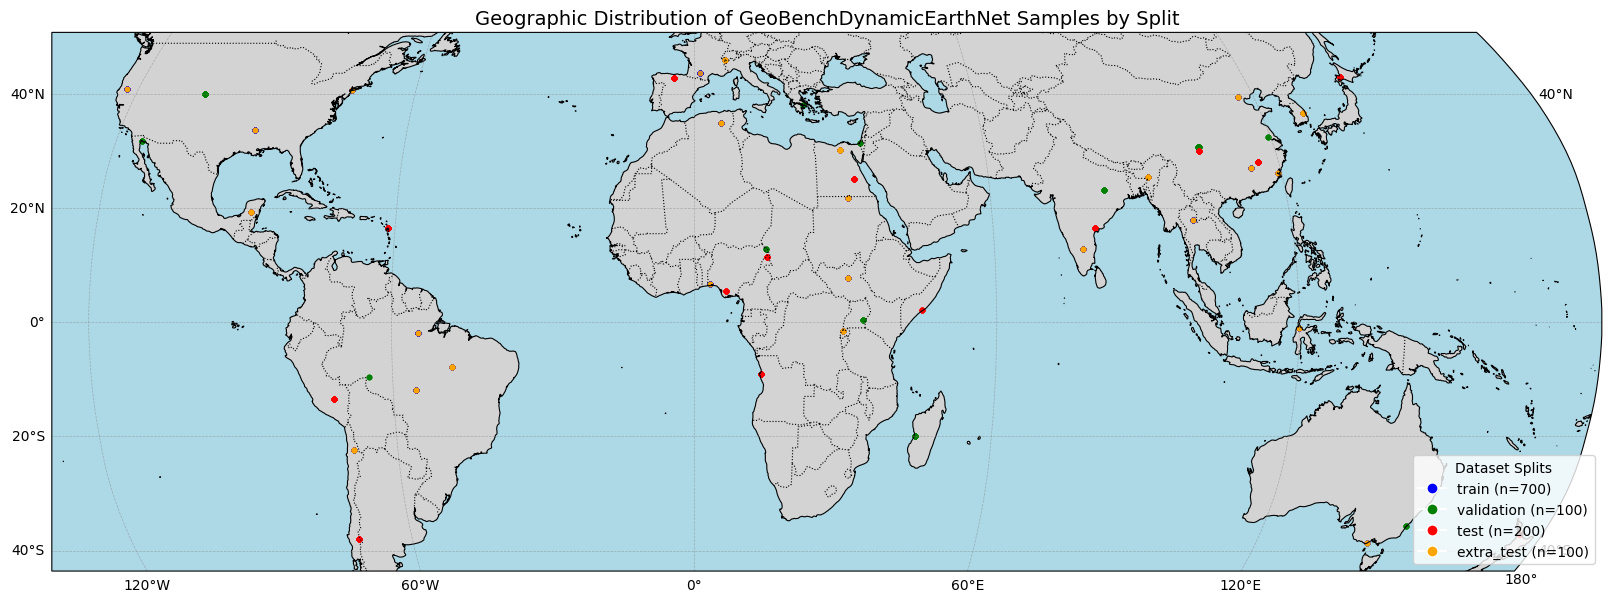

In [4]:
geo_fig = datamodule.visualize_geospatial_distribution()

## Sample Data Visualization


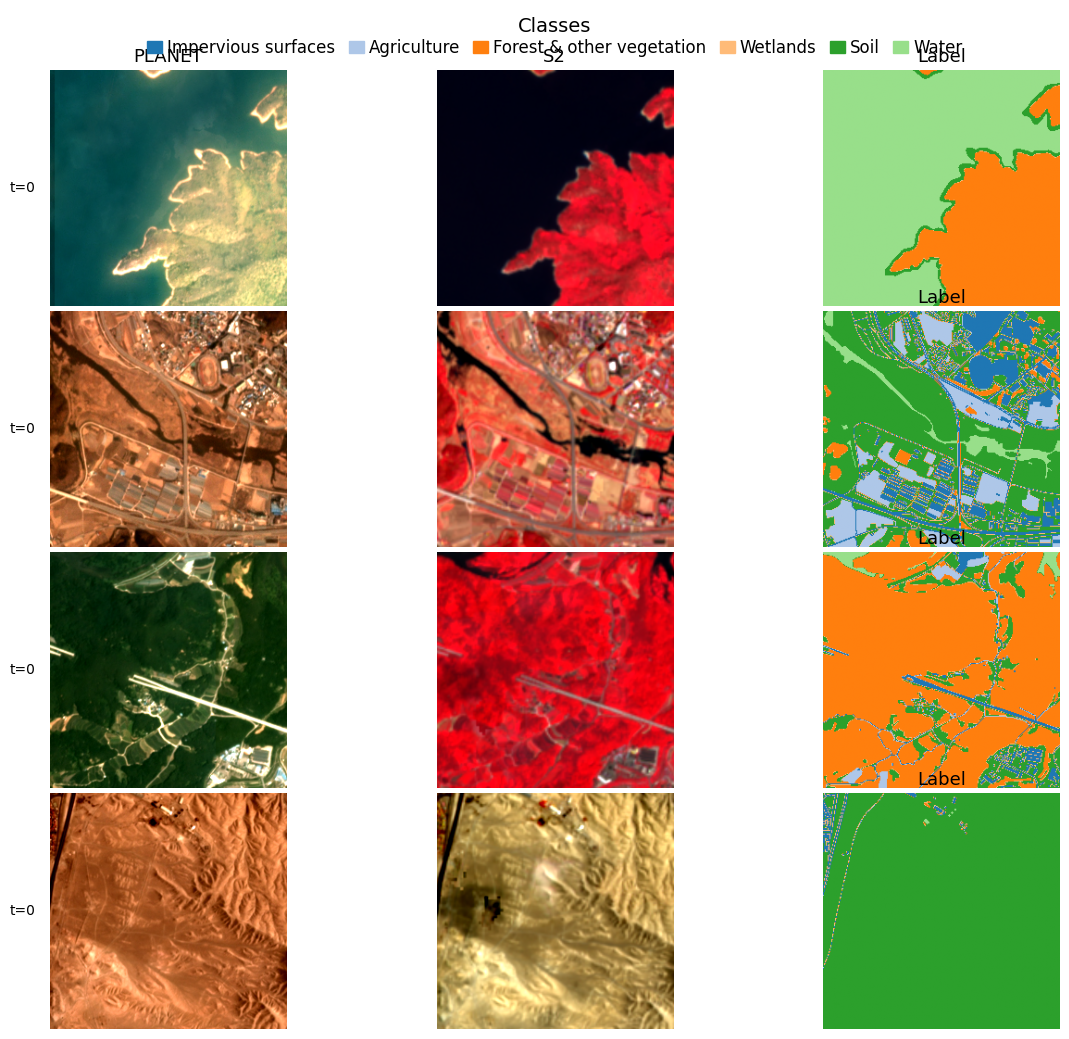

In [ ]:
fig, batch = datamodule.visualize_batch()

## GeoBenchV2 Processing Pipeline

### Preprocessing Steps

1. **Patch Generation**
   - Original tiles of 1024x1024 were split into 4 512x512 patches

2. **Split Generation**:
   - Applied location-based splitting to the unique locations
   - Used 8x8 geographic binning across globe to ensure global representation in each split
   - Implemented space-time disjointness: same locations never appear across different splits
   - Rebalanced splits to guarantee geographic diversity while maintaining temporal independence

3. **Dataset Subsamping**:
   - The final version consists of
      - 4,000 training samples
      - 1,000 validation samples
      - 2,000 test samples


## References

1. Toker, A., Kondmann, L., Weber, M., Eisenberger, M., Camero, A., Hu, J., Hoderlein, A.P., Şenaras, Ç., Davis, T., Cremers, D. and Marchisio, G., 2022. Dynamicearthnet: Daily multi-spectral satellite dataset for semantic change segmentation. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 21158-21167).